# Regresión logística

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,balanced_accuracy_score,f1_score,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [53]:
def acierto(list1,list2):
    sum = 0
    for i in range(0,len(list1)):
        if(list1[i]==list2[i]):
            sum = sum +1
    a = sum/len(list1[i])
    return a

#### Tasa de aciertos balanceada (balanced accuracy)

Recordemos que existe otra medida combinada, la precisión balanceada. En este caso combina la sensibilidad o recall y la exhaustividad. Una forma más intuitiva de ver esta métrica es como la media de las tasas de aciertos calculadas sobre las clases positiva y negativa respectivamente.


$$B_{acc} =\frac{Sensibility + Especificity}{2} = \frac{\frac{TP}{TP+FN} + \frac{TN}{FP+TN}}{2}$$

#### Medida F1

\begin{equation}
\text{F1} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

#### ¿Es mejor la medida F1 o la tasa de aciertos balanceada?
Aqui para escribir: https://datascience.stackexchange.com/questions/73974/balanced-accuracy-vs-f1-score

## DIARIO

Cargamos los datos:

In [3]:
run Datos-1diaBINARIO.ipynb

### EXPERIMENTO 1: MODELO BASE

In [3]:
# MODELO CON EL CONJUNTO DE DATOS 1
# -------------------------------------------------------------------
logreg1 = LogisticRegression(max_iter=10000).fit(trainX1, trainy1)
pred_logreg1 = logreg1.predict(testX1)
confusion1 = confusion_matrix(testy1, pred_logreg1)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg1.score(testX1, testy1)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, pred_logreg1)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy1, pred_logreg1)))
print("Matriz de confusión:\n{}".format(confusion1))

Tasa de acierto en regresión logística: 0.49
Tasa de aciertos balanceada regresión logística: 0.50
Medida F1 regresión logística: 0.54
Matriz de confusión:
[[ 74 125]
 [ 67 111]]


In [4]:
# MODELO CON EL CONJUNTO DE DATOS 2
# -------------------------------------------------------------------
logreg2 = LogisticRegression(max_iter=10000).fit(trainX2, trainy2)
pred_logreg2 = logreg2.predict(testX2)
confusion2 = confusion_matrix(testy2, pred_logreg2)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg2.score(testX2, testy2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, pred_logreg2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, pred_logreg2)))
print("Matriz de confusión:\n{}".format(confusion2))

Tasa de acierto en regresión logística: 0.50
Tasa de aciertos balanceada regresión logística: 0.50
Medida F1 regresión logística: 0.52
Matriz de confusión:
[[ 83 112]
 [ 72  99]]


In [5]:
# MODELO CON EL CONJUNTO DE DATOS 3
# -------------------------------------------------------------------
logreg3 = LogisticRegression(max_iter=10000).fit(trainX3, trainy3)
pred_logreg3 = logreg3.predict(testX3)
confusion = confusion_matrix(testy3, pred_logreg3)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg3.score(testX3, testy3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, pred_logreg3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, pred_logreg3)))
print("Matriz de confusión:\n{}".format(confusion))

Tasa de acierto en regresión logística: 0.49
Tasa de aciertos balanceada regresión logística: 0.50
Medida F1 regresión logística: 0.54
Matriz de confusión:
[[ 73 121]
 [ 62 106]]


### EXPERIMENTO 1: GRIDSEARCH

In [6]:
# MODELO CON EL CONJUNTO DE DATOS 1
# -------------------------------------------------------------------
modelgrid1 = LogisticRegression()
parameters1 = {"C":np.logspace(-3,3,7), "penalty":["none","l2"]}
grid1 = GridSearchCV(modelgrid1,parameters1, cv=None).fit(trainX1, trainy1)
grid1.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will i

LogisticRegression(C=0.001)

In [9]:
lrgrid1 = LogisticRegression(C=0.001).fit(trainX1, trainy1)
y_predg1 = lrgrid1.predict(testX1)

In [10]:
pred_lrgrid1 = lrgrid1.predict(testX1)
confusiong1 = confusion_matrix(testy1, pred_lrgrid1)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid1.score(testX1, testy1)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, pred_logreg1)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy1, pred_logreg1)))
print("Matriz de confusión:\n{}".format(confusiong1))

Tasa de acierto en regresión logística: 0.49
Tasa de aciertos balanceada regresión logística: 0.50
Medida F1 regresión logística: 0.54
Matriz de confusión:
[[ 74 125]
 [ 67 111]]


In [7]:
# MODELO CON EL CONJUNTO DE DATOS 2
# -------------------------------------------------------------------
modelgrid2 = LogisticRegression()
parameters2 = {"C":np.logspace(-3,3,7), "penalty":["none","l2"]}
grid2 = GridSearchCV(modelgrid2,parameters2, cv=None).fit(trainX2, trainy2)
grid2.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=0.001, penalty='none')

In [11]:
lrgrid2 = LogisticRegression(C=0.001, penalty='none').fit(trainX2, trainy2)
y_predg2 = lrgrid2.predict(testX2)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
pred_lrgrid2 = lrgrid2.predict(testX2)
confusiong2 = confusion_matrix(testy2, pred_lrgrid2)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid2.score(testX2, testy2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, pred_logreg2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, pred_logreg2)))
print("Matriz de confusión:\n{}".format(confusiong2))

Tasa de acierto en regresión logística: 0.51
Tasa de aciertos balanceada regresión logística: 0.50
Medida F1 regresión logística: 0.52
Matriz de confusión:
[[ 83 112]
 [ 69 102]]


In [8]:
# MODELO CON EL CONJUNTO DE DATOS 3
# -------------------------------------------------------------------
modelgrid3 = LogisticRegression()
parameters3 = {"C":np.logspace(-3,3,7), "penalty":["l2",None]}
grid3 = GridSearchCV(modelgrid3,parameters3, cv=None).fit(trainX3, trainy3)
grid3.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

LogisticRegression(C=0.001)

In [13]:
lrgrid3 = LogisticRegression(C=0.001).fit(trainX3, trainy3)
y_predg3 = lrgrid3.predict(testX3)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
pred_lrgrid3 = lrgrid3.predict(testX3)
confusiong3 = confusion_matrix(testy3, pred_lrgrid3)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid3.score(testX3, testy3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, pred_logreg3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, pred_logreg3)))
print("Matriz de confusión:\n{}".format(confusiong3))

Tasa de acierto en regresión logística: 0.49
Tasa de aciertos balanceada regresión logística: 0.50
Medida F1 regresión logística: 0.54
Matriz de confusión:
[[ 68 126]
 [ 58 110]]


### Mejora Modelo Base - Datos 2

#### Usando la incertidumbre en las predicciones: umbrales y curvas

Para comenzar podemos ver como la proporción de datos entre la clase de bajada y la de subida es mas o menos de un 50%

In [11]:
testy2.value_counts() + trainy2.value_counts()

0.0    880
1.0    947
Name: Subida, dtype: int64


El clasificador no solamente hacen predicciones de la clase, sino que suelen proporcionar un grado de certidumbre en la predicción que realizan.Para regresión logística el grado de certidumbre se da en forma de probabilidad (un valor entre 0 y 1). En ese caso, el método `predict` devolverá la clase positiva si la probabilidad está por encima de 0.5, y la clase negativa en caso contrario.

En ambos casos existen unos valores por defecto del _umbral_ en la incertidumbre, a partir del cual decidimos clasificar un ejemplo como de la clase positiva; vamos a tomar umbrales diferentes (tanto al alza como a la baja) para considerar que un ejemplo está en la dicha clase. Podríamos así ser más o menos estrictos a la hora de la clasificación. Y esto influiría indudablemente en las métricas definidas anteriormente. 

In [12]:
print(classification_report(testy2, pred_logreg2,target_names=["Baja", "Sube"]))

              precision    recall  f1-score   support

        Baja       0.54      0.43      0.47       195
        Sube       0.47      0.58      0.52       171

    accuracy                           0.50       366
   macro avg       0.50      0.50      0.50       366
weighted avg       0.50      0.50      0.49       366



In [13]:
confusion2 = confusion_matrix(testy2, pred_logreg2)
print("Matriz de confusión:\n{}".format(confusion2))

Matriz de confusión:
[[ 83 112]
 [ 72  99]]


Tenemos que el recall de subida es muy bajo, si va a subir, queremos que la predicción sea mejor, por lo que podemos bajar el umbral un poco, para ver como se comporta el modelo.

In [41]:
y_pred_lower_threshold2 = logreg2.decision_function(testX2) > 0.1

In [74]:
confusiongumbral = confusion_matrix(testy2, y_pred_lower_threshold2)
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(accuracy_score(testy2, y_pred_lower_threshold2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_pred_lower_threshold2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, y_pred_lower_threshold2)))
print("Matriz de confusión:\n{}".format(confusiongumbral))

Tasa de aciertos balanceada regresión logística: 0.51
Tasa de aciertos balanceada regresión logística: 0.51
Medida F1 regresión logística: 0.49
Matriz de confusión:
[[103  92]
 [ 86  85]]


Podemos ver cómo cambian los valores de precision ($p$)  y recall ($r$) con los distintos umbrales, y eso se hace de mánera gráfica con lo que se conoce como _curva precision-recall_ o _curva PR_:  es la curva que describen todos los puntos $(p,r)$ que se obtienen si vamos variando el umbral.

In [18]:
precision, recall, thresholds = precision_recall_curve( testy2, logreg2.decision_function(testX2))
for u,p,r in zip(thresholds,precision,recall):
    print("Umbral: {:.3f}. (P,R)=({:.2f},{:.2f})".format(u,p,r))

Umbral: -0.941. (P,R)=(0.47,1.00)
Umbral: -0.854. (P,R)=(0.47,0.99)
Umbral: -0.839. (P,R)=(0.46,0.99)
Umbral: -0.838. (P,R)=(0.47,0.99)
Umbral: -0.727. (P,R)=(0.47,0.99)
Umbral: -0.694. (P,R)=(0.47,0.99)
Umbral: -0.694. (P,R)=(0.47,0.98)
Umbral: -0.687. (P,R)=(0.47,0.98)
Umbral: -0.643. (P,R)=(0.47,0.98)
Umbral: -0.628. (P,R)=(0.47,0.98)
Umbral: -0.628. (P,R)=(0.47,0.98)
Umbral: -0.601. (P,R)=(0.47,0.98)
Umbral: -0.597. (P,R)=(0.47,0.98)
Umbral: -0.594. (P,R)=(0.47,0.97)
Umbral: -0.587. (P,R)=(0.47,0.96)
Umbral: -0.556. (P,R)=(0.47,0.96)
Umbral: -0.553. (P,R)=(0.47,0.96)
Umbral: -0.546. (P,R)=(0.47,0.96)
Umbral: -0.544. (P,R)=(0.47,0.96)
Umbral: -0.542. (P,R)=(0.47,0.96)
Umbral: -0.529. (P,R)=(0.47,0.95)
Umbral: -0.520. (P,R)=(0.47,0.95)
Umbral: -0.518. (P,R)=(0.47,0.95)
Umbral: -0.517. (P,R)=(0.47,0.95)
Umbral: -0.513. (P,R)=(0.47,0.94)
Umbral: -0.502. (P,R)=(0.47,0.94)
Umbral: -0.487. (P,R)=(0.47,0.93)
Umbral: -0.479. (P,R)=(0.47,0.92)
Umbral: -0.471. (P,R)=(0.47,0.92)
Umbral: -0.466

Text(0.5, 1.0, 'Curva PR')

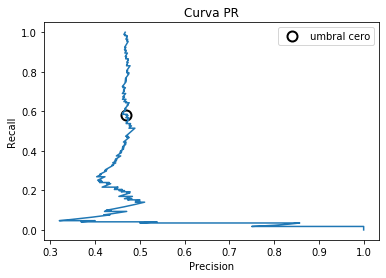

In [23]:
precision, recall, thresholds = precision_recall_curve(testy2, logreg2.decision_function(testX2))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="umbral cero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Curva PR")

##### Curva ROC (Receiver Operating Characteristics) y AUC (area under curve)

Otra curva que se usa muy frecuentemente para analizar el comportamiento de clasificadores binarios, y especialmente en problemas en el que las clases no están equilibradas, es la curva ROC (siglas de _Receiver Operating Characteristics_). La idea es similar a la de la curva PR, pero en este caso la curva se forma con los puntos $(FPR,TPR)$ que se generan variando el umbral. Aquí $TPR$ es _true positive rate_ y es otro nombre para _recall_; y $FPR$ es _false Postive rate_ y se defina como la tasa de error que tiene el clasificador en el conjunto de ejemplos negativos. Es decir:

\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

Text(0.5, 1.0, 'Curva ROC')

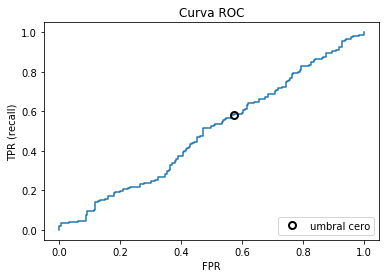

In [24]:
fpr, tpr, thresholds = roc_curve(testy2, logreg2.decision_function(testX2))

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=7,label="umbral cero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.title("Curva ROC")

La gráfica empieza cuando todo se clasifica como negativo y acaba cuando todo lo clasifica como positivo. Podemos observar que el mejor umbral, porque en el ninguna de las dos métricas(TPR,FPR) es muy baja, va a ser el umbral 0.

## HORARIO

Cargamos los datos:

In [75]:
run Datos-1horaBINARIO.ipynb

### EXPERIMENTO 1: MODELO BASE

In [76]:
# MODELO CON EL CONJUNTO DE DATOS 1
# -------------------------------------------------------------------
logreg1 = LogisticRegression(max_iter=10000).fit(trainX1, trainy1)
pred_logreg1 = logreg1.predict(testX1)
confusion1 = confusion_matrix(testy1, pred_logreg1)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg1.score(testX1, testy1)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, pred_logreg1)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy1, pred_logreg1)))
print("Matriz de confusión:\n{}".format(confusion1))

Tasa de acierto en regresión logística: 0.53
Tasa de aciertos balanceada regresión logística: 0.53
Medida F1 regresión logística: 0.61
Matriz de confusión:
[[1515 3035]
 [1211 3260]]


In [77]:
# MODELO CON EL CONJUNTO DE DATOS 2
# -------------------------------------------------------------------
logreg2 = LogisticRegression(max_iter=10000).fit(trainX2, trainy2)
pred_logreg2 = logreg2.predict(testX2)
confusion2 = confusion_matrix(testy2, pred_logreg2)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg2.score(testX2, testy2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, pred_logreg2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, pred_logreg2)))
print("Matriz de confusión:\n{}".format(confusion2))

Tasa de acierto en regresión logística: 0.54
Tasa de aciertos balanceada regresión logística: 0.54
Medida F1 regresión logística: 0.60
Matriz de confusión:
[[1673 2871]
 [1306 3160]]


In [78]:
# MODELO CON EL CONJUNTO DE DATOS 3
# -------------------------------------------------------------------
logreg3 = LogisticRegression(max_iter=10000).fit(trainX3, trainy3)
pred_logreg3 = logreg3.predict(testX3)
confusion = confusion_matrix(testy3, pred_logreg3)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg3.score(testX3, testy3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, pred_logreg3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, pred_logreg3)))
print("Matriz de confusión:\n{}".format(confusion))

Tasa de acierto en regresión logística: 0.54
Tasa de aciertos balanceada regresión logística: 0.54
Medida F1 regresión logística: 0.57
Matriz de confusión:
[[2079 2464]
 [1673 2790]]


### EXPERIMENTO 1: GRIDSEARCH

In [80]:
# MODELO CON EL CONJUNTO DE DATOS 1
# -------------------------------------------------------------------
modelgrid1 = LogisticRegression()
parameters1 = {"C":np.logspace(-3,3,7), "penalty":["none","l2"]}
grid1 = GridSearchCV(modelgrid1,parameters1, cv=None).fit(trainX1, trainy1)
grid1.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will i

LogisticRegression(C=0.1)

In [81]:
lrgrid1 = LogisticRegression(C=0.1).fit(trainX1, trainy1)
y_predg1 = lrgrid1.predict(testX1)

In [82]:
pred_lrgrid1 = lrgrid1.predict(testX1)
confusiong1 = confusion_matrix(testy1, pred_lrgrid1)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid1.score(testX1, testy1)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, pred_logreg1)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy1, pred_logreg1)))
print("Matriz de confusión:\n{}".format(confusiong1))

Tasa de acierto en regresión logística: 0.53
Tasa de aciertos balanceada regresión logística: 0.53
Medida F1 regresión logística: 0.61
Matriz de confusión:
[[1515 3035]
 [1211 3260]]


In [84]:
# MODELO CON EL CONJUNTO DE DATOS 2
# -------------------------------------------------------------------
modelgrid2 = LogisticRegression()
parameters2 = {"C":np.logspace(-3,3,7), "penalty":["none","l2",]}
grid2 = GridSearchCV(modelgrid2,parameters2, cv=None).fit(trainX2, trainy2)
grid2.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=0.001)

In [85]:
lrgrid2 = LogisticRegression(C=0.001).fit(trainX2, trainy2)
y_predg2 = lrgrid2.predict(testX2)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [86]:
pred_lrgrid2 = lrgrid2.predict(testX2)
confusiong2 = confusion_matrix(testy2, pred_lrgrid2)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid2.score(testX2, testy2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, pred_logreg2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, pred_logreg2)))
print("Matriz de confusión:\n{}".format(confusiong2))

Tasa de acierto en regresión logística: 0.54
Tasa de aciertos balanceada regresión logística: 0.54
Medida F1 regresión logística: 0.60
Matriz de confusión:
[[1694 2850]
 [1327 3139]]


In [87]:
# MODELO CON EL CONJUNTO DE DATOS 3
# -------------------------------------------------------------------
modelgrid3 = LogisticRegression()
parameters3 = {"C":np.logspace(-3,3,7), "penalty":["l1","l2",None]}
grid3 = GridSearchCV(modelgrid3,parameters3, cv=None).fit(trainX3, trainy3)
grid3.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO.

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO.

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10.0)

In [88]:
lrgrid3 = LogisticRegression(C=10.0).fit(trainX3, trainy3)
y_predg3 = lrgrid3.predict(testX3)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [89]:
pred_lrgrid3 = lrgrid3.predict(testX3)
confusiong3 = confusion_matrix(testy3, pred_lrgrid3)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid3.score(testX3, testy3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, pred_logreg3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, pred_logreg3)))
print("Matriz de confusión:\n{}".format(confusiong3))

Tasa de acierto en regresión logística: 0.53
Tasa de aciertos balanceada regresión logística: 0.54
Medida F1 regresión logística: 0.57
Matriz de confusión:
[[1553 2990]
 [1251 3212]]


### Mejora Modelo Base- Conjunto de datos 2

#### Usando la incertidumbre en las predicciones: umbrales y curvas

In [90]:
testy2.value_counts() + trainy2.value_counts()

0.0    22051
1.0    22998
Name: Subida, dtype: int64

In [91]:
print(classification_report(testy2, pred_logreg2,target_names=["Baja", "Sube"]))

              precision    recall  f1-score   support

        Baja       0.56      0.37      0.44      4544
        Sube       0.52      0.71      0.60      4466

    accuracy                           0.54      9010
   macro avg       0.54      0.54      0.52      9010
weighted avg       0.54      0.54      0.52      9010



In [92]:
confusion2 = confusion_matrix(testy2, pred_logreg2)
print("Matriz de confusión:\n{}".format(confusion2))

Matriz de confusión:
[[1673 2871]
 [1306 3160]]


In [122]:
y_pred_lower_threshold2 = logreg2.decision_function(testX2) > 0.0005

In [123]:
confusiongumbral = confusion_matrix(testy2, y_pred_lower_threshold2)
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(accuracy_score(testy2, y_pred_lower_threshold2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_pred_lower_threshold2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, y_pred_lower_threshold2)))
print("Matriz de confusión:\n{}".format(confusiongumbral))

Tasa de aciertos balanceada regresión logística: 0.54
Tasa de aciertos balanceada regresión logística: 0.54
Medida F1 regresión logística: 0.60
Matriz de confusión:
[[1679 2865]
 [1314 3152]]


In [95]:
precision, recall, thresholds = precision_recall_curve( testy2, logreg2.decision_function(testX2))
for u,p,r in zip(thresholds,precision,recall):
    print("Umbral: {:.3f}. (P,R)=({:.2f},{:.2f})".format(u,p,r))

Umbral: -1.086. (P,R)=(0.50,1.00)
Umbral: -0.920. (P,R)=(0.50,1.00)
Umbral: -0.918. (P,R)=(0.50,1.00)
Umbral: -0.906. (P,R)=(0.50,1.00)
Umbral: -0.903. (P,R)=(0.50,1.00)
Umbral: -0.857. (P,R)=(0.50,1.00)
Umbral: -0.848. (P,R)=(0.50,1.00)
Umbral: -0.843. (P,R)=(0.50,1.00)
Umbral: -0.841. (P,R)=(0.50,1.00)
Umbral: -0.802. (P,R)=(0.50,1.00)
Umbral: -0.802. (P,R)=(0.50,1.00)
Umbral: -0.795. (P,R)=(0.50,1.00)
Umbral: -0.791. (P,R)=(0.50,1.00)
Umbral: -0.791. (P,R)=(0.50,1.00)
Umbral: -0.784. (P,R)=(0.50,1.00)
Umbral: -0.762. (P,R)=(0.50,1.00)
Umbral: -0.758. (P,R)=(0.50,1.00)
Umbral: -0.737. (P,R)=(0.50,1.00)
Umbral: -0.708. (P,R)=(0.50,1.00)
Umbral: -0.700. (P,R)=(0.50,1.00)
Umbral: -0.678. (P,R)=(0.50,1.00)
Umbral: -0.669. (P,R)=(0.50,1.00)
Umbral: -0.662. (P,R)=(0.50,1.00)
Umbral: -0.661. (P,R)=(0.50,1.00)
Umbral: -0.655. (P,R)=(0.50,1.00)
Umbral: -0.646. (P,R)=(0.50,1.00)
Umbral: -0.642. (P,R)=(0.50,1.00)
Umbral: -0.642. (P,R)=(0.50,1.00)
Umbral: -0.636. (P,R)=(0.50,1.00)
Umbral: -0.628

Umbral: -0.120. (P,R)=(0.51,0.90)
Umbral: -0.120. (P,R)=(0.51,0.90)
Umbral: -0.120. (P,R)=(0.51,0.90)
Umbral: -0.120. (P,R)=(0.51,0.90)
Umbral: -0.120. (P,R)=(0.51,0.90)
Umbral: -0.119. (P,R)=(0.51,0.90)
Umbral: -0.119. (P,R)=(0.51,0.90)
Umbral: -0.119. (P,R)=(0.51,0.90)
Umbral: -0.119. (P,R)=(0.51,0.90)
Umbral: -0.119. (P,R)=(0.51,0.90)
Umbral: -0.119. (P,R)=(0.51,0.90)
Umbral: -0.119. (P,R)=(0.51,0.90)
Umbral: -0.119. (P,R)=(0.51,0.90)
Umbral: -0.119. (P,R)=(0.51,0.90)
Umbral: -0.118. (P,R)=(0.51,0.90)
Umbral: -0.118. (P,R)=(0.51,0.90)
Umbral: -0.118. (P,R)=(0.51,0.90)
Umbral: -0.118. (P,R)=(0.51,0.90)
Umbral: -0.118. (P,R)=(0.51,0.90)
Umbral: -0.118. (P,R)=(0.51,0.90)
Umbral: -0.118. (P,R)=(0.51,0.90)
Umbral: -0.118. (P,R)=(0.51,0.90)
Umbral: -0.118. (P,R)=(0.51,0.90)
Umbral: -0.118. (P,R)=(0.51,0.90)
Umbral: -0.117. (P,R)=(0.51,0.90)
Umbral: -0.117. (P,R)=(0.51,0.90)
Umbral: -0.117. (P,R)=(0.51,0.90)
Umbral: -0.117. (P,R)=(0.51,0.90)
Umbral: -0.117. (P,R)=(0.51,0.90)
Umbral: -0.117

Umbral: -0.077. (P,R)=(0.51,0.85)
Umbral: -0.077. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.076. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.075. (P,R)=(0.51,0.85)
Umbral: -0.074

Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.019. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018. (P,R)=(0.52,0.75)
Umbral: -0.018

Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.003. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.004. (P,R)=(0.52,0.70)
Umbral: 0.

Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.041. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.042. (P,R)=(0.53,0.59)
Umbral: 0.

Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.077. (P,R)=(0.53,0.47)
Umbral: 0.078. (P,R)=(0.53,0.47)
Umbral: 0.078. (P,R)=(0.53,0.47)
Umbral: 0.078. (P,R)=(0.53,0.47)
Umbral: 0.078. (P,R)=(0.53,0.47)
Umbral: 0.078. (P,R)=(0.53,0.47)
Umbral: 0.078. (P,R)=(0.53,0.47)
Umbral: 0.

Umbral: 0.097. (P,R)=(0.54,0.42)
Umbral: 0.097. (P,R)=(0.54,0.41)
Umbral: 0.097. (P,R)=(0.54,0.41)
Umbral: 0.097. (P,R)=(0.54,0.41)
Umbral: 0.097. (P,R)=(0.54,0.41)
Umbral: 0.097. (P,R)=(0.54,0.41)
Umbral: 0.097. (P,R)=(0.54,0.41)
Umbral: 0.097. (P,R)=(0.54,0.41)
Umbral: 0.097. (P,R)=(0.54,0.41)
Umbral: 0.097. (P,R)=(0.54,0.41)
Umbral: 0.097. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.098. (P,R)=(0.54,0.41)
Umbral: 0.

Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.120. (P,R)=(0.54,0.36)
Umbral: 0.121. (P,R)=(0.54,0.36)
Umbral: 0.121. (P,R)=(0.54,0.35)
Umbral: 0.121. (P,R)=(0.54,0.35)
Umbral: 0.121. (P,R)=(0.54,0.35)
Umbral: 0.121. (P,R)=(0.54,0.35)
Umbral: 0.121. (P,R)=(0.54,0.35)
Umbral: 0.121. (P,R)=(0.54,0.35)
Umbral: 0.121. (P,R)=(0.54,0.35)
Umbral: 0.121. (P,R)=(0.54,0.35)
Umbral: 0.121. (P,R)=(0.54,0.35)
Umbral: 0.

Umbral: 0.146. (P,R)=(0.55,0.30)
Umbral: 0.146. (P,R)=(0.55,0.30)
Umbral: 0.146. (P,R)=(0.55,0.30)
Umbral: 0.146. (P,R)=(0.55,0.30)
Umbral: 0.146. (P,R)=(0.55,0.30)
Umbral: 0.146. (P,R)=(0.55,0.30)
Umbral: 0.146. (P,R)=(0.55,0.30)
Umbral: 0.146. (P,R)=(0.55,0.30)
Umbral: 0.146. (P,R)=(0.55,0.30)
Umbral: 0.146. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.147. (P,R)=(0.55,0.30)
Umbral: 0.148. (P,R)=(0.55,0.30)
Umbral: 0.148. (P,R)=(0.55,0.30)
Umbral: 0.148. (P,R)=(0.55,0.30)
Umbral: 0.148. (P,R)=(0.55,0.30)
Umbral: 0.148. (P,R)=(0.55,0.30)
Umbral: 0.148. (P,R)=(0.55,0.30)
Umbral: 0.

Umbral: 0.222. (P,R)=(0.55,0.18)
Umbral: 0.222. (P,R)=(0.55,0.18)
Umbral: 0.222. (P,R)=(0.55,0.18)
Umbral: 0.222. (P,R)=(0.55,0.18)
Umbral: 0.222. (P,R)=(0.55,0.18)
Umbral: 0.222. (P,R)=(0.55,0.18)
Umbral: 0.222. (P,R)=(0.55,0.18)
Umbral: 0.222. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.223. (P,R)=(0.55,0.18)
Umbral: 0.224. (P,R)=(0.55,0.18)
Umbral: 0.224. (P,R)=(0.55,0.18)
Umbral: 0.224. (P,R)=(0.55,0.18)
Umbral: 0.224. (P,R)=(0.55,0.18)
Umbral: 0.224. (P,R)=(0.55,0.18)
Umbral: 0.224. (P,R)=(0.55,0.18)
Umbral: 0.224. (P,R)=(0.55,0.18)
Umbral: 0.224. (P,R)=(0.55,0.17)
Umbral: 0.224. (P,R)=(0.55,0.17)
Umbral: 0.

Umbral: 0.281. (P,R)=(0.53,0.11)
Umbral: 0.281. (P,R)=(0.53,0.11)
Umbral: 0.281. (P,R)=(0.53,0.11)
Umbral: 0.281. (P,R)=(0.53,0.11)
Umbral: 0.281. (P,R)=(0.53,0.11)
Umbral: 0.281. (P,R)=(0.53,0.11)
Umbral: 0.282. (P,R)=(0.53,0.11)
Umbral: 0.282. (P,R)=(0.53,0.11)
Umbral: 0.282. (P,R)=(0.53,0.11)
Umbral: 0.282. (P,R)=(0.53,0.11)
Umbral: 0.282. (P,R)=(0.53,0.11)
Umbral: 0.282. (P,R)=(0.53,0.11)
Umbral: 0.283. (P,R)=(0.53,0.11)
Umbral: 0.283. (P,R)=(0.54,0.11)
Umbral: 0.283. (P,R)=(0.53,0.11)
Umbral: 0.283. (P,R)=(0.54,0.11)
Umbral: 0.283. (P,R)=(0.54,0.11)
Umbral: 0.283. (P,R)=(0.54,0.11)
Umbral: 0.283. (P,R)=(0.54,0.11)
Umbral: 0.283. (P,R)=(0.54,0.11)
Umbral: 0.284. (P,R)=(0.54,0.11)
Umbral: 0.284. (P,R)=(0.54,0.11)
Umbral: 0.284. (P,R)=(0.54,0.11)
Umbral: 0.285. (P,R)=(0.54,0.11)
Umbral: 0.285. (P,R)=(0.54,0.11)
Umbral: 0.285. (P,R)=(0.54,0.11)
Umbral: 0.285. (P,R)=(0.54,0.11)
Umbral: 0.285. (P,R)=(0.54,0.11)
Umbral: 0.285. (P,R)=(0.54,0.11)
Umbral: 0.286. (P,R)=(0.54,0.11)
Umbral: 0.

Umbral: 0.480. (P,R)=(0.52,0.03)
Umbral: 0.484. (P,R)=(0.52,0.03)
Umbral: 0.484. (P,R)=(0.52,0.03)
Umbral: 0.484. (P,R)=(0.52,0.03)
Umbral: 0.486. (P,R)=(0.52,0.03)
Umbral: 0.486. (P,R)=(0.52,0.03)
Umbral: 0.487. (P,R)=(0.52,0.03)
Umbral: 0.487. (P,R)=(0.52,0.03)
Umbral: 0.488. (P,R)=(0.52,0.03)
Umbral: 0.488. (P,R)=(0.52,0.03)
Umbral: 0.488. (P,R)=(0.52,0.03)
Umbral: 0.488. (P,R)=(0.52,0.03)
Umbral: 0.488. (P,R)=(0.52,0.03)
Umbral: 0.489. (P,R)=(0.52,0.03)
Umbral: 0.490. (P,R)=(0.52,0.03)
Umbral: 0.491. (P,R)=(0.52,0.03)
Umbral: 0.491. (P,R)=(0.53,0.03)
Umbral: 0.491. (P,R)=(0.53,0.03)
Umbral: 0.492. (P,R)=(0.53,0.03)
Umbral: 0.492. (P,R)=(0.53,0.03)
Umbral: 0.492. (P,R)=(0.53,0.03)
Umbral: 0.493. (P,R)=(0.53,0.03)
Umbral: 0.493. (P,R)=(0.53,0.03)
Umbral: 0.493. (P,R)=(0.53,0.03)
Umbral: 0.494. (P,R)=(0.53,0.03)
Umbral: 0.496. (P,R)=(0.53,0.03)
Umbral: 0.497. (P,R)=(0.53,0.03)
Umbral: 0.497. (P,R)=(0.53,0.03)
Umbral: 0.498. (P,R)=(0.53,0.03)
Umbral: 0.499. (P,R)=(0.53,0.03)
Umbral: 0.

Text(0.5, 1.0, 'Curva PR')

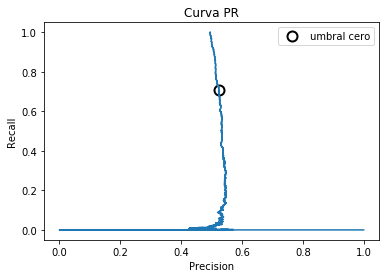

In [96]:
precision, recall, thresholds = precision_recall_curve(testy2, logreg2.decision_function(testX2))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="umbral cero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Curva PR")

Text(0.5, 1.0, 'Curva ROC')

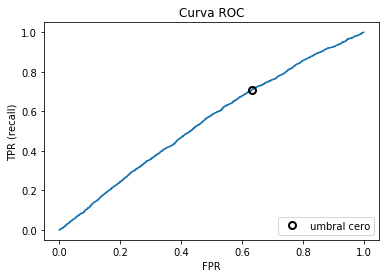

In [97]:
fpr, tpr, thresholds = roc_curve(testy2, logreg2.decision_function(testX2))

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=7,label="umbral cero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.title("Curva ROC")

## 5 DIAS

Cargamos los datos:

In [124]:
run Datos-5diasBINARIO.ipynb

### EXPERIMENTO 1: MODELO BASE

In [125]:
# MODELO CON EL CONJUNTO DE DATOS 1
# -------------------------------------------------------------------
logreg1 = LogisticRegression(max_iter=10000).fit(trainX1, trainy1)
pred_logreg1 = logreg1.predict(testX1)
confusion1 = confusion_matrix(testy1, pred_logreg1)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg1.score(testX1, testy1)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, pred_logreg1)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy1, pred_logreg1)))
print("Matriz de confusión:\n{}".format(confusion1))

Tasa de acierto en regresión logística: 0.47
Tasa de aciertos balanceada regresión logística: 0.49
Medida F1 regresión logística: 0.58
Matriz de confusión:
[[ 44 155]
 [ 43 134]]


In [126]:
# MODELO CON EL CONJUNTO DE DATOS 2
# -------------------------------------------------------------------
logreg2 = LogisticRegression(max_iter=10000).fit(trainX2, trainy2)
pred_logreg2 = logreg2.predict(testX2)
confusion2 = confusion_matrix(testy2, pred_logreg2)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg2.score(testX2, testy2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, pred_logreg2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, pred_logreg2)))
print("Matriz de confusión:\n{}".format(confusion2))

Tasa de acierto en regresión logística: 0.51
Tasa de aciertos balanceada regresión logística: 0.52
Medida F1 regresión logística: 0.56
Matriz de confusión:
[[ 74 120]
 [ 58 112]]


In [127]:
# MODELO CON EL CONJUNTO DE DATOS 3
# -------------------------------------------------------------------
logreg3 = LogisticRegression(max_iter=10000).fit(trainX3, trainy3)
pred_logreg3 = logreg3.predict(testX3)
confusion = confusion_matrix(testy3, pred_logreg3)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg3.score(testX3, testy3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, pred_logreg3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, pred_logreg3)))
print("Matriz de confusión:\n{}".format(confusion))

Tasa de acierto en regresión logística: 0.52
Tasa de aciertos balanceada regresión logística: 0.52
Medida F1 regresión logística: 0.50
Matriz de confusión:
[[97 93]
 [81 88]]


### EXPERIMENTO 1: GRIDSEARCH

In [128]:
# MODELO CON EL CONJUNTO DE DATOS 1
# -------------------------------------------------------------------
modelgrid1 = LogisticRegression()
parameters1 = {"C":np.logspace(-3,3,7), "penalty":["none","l2"]}
grid1 = GridSearchCV(modelgrid1,parameters1, cv=None).fit(trainX1, trainy1)
grid1.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will i

LogisticRegression(C=0.001, penalty='none')

In [131]:
lrgrid1 = LogisticRegression(C=0.001, penalty='none').fit(trainX1, trainy1)
y_predg1 = lrgrid1.predict(testX1)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [132]:
pred_lrgrid1 = lrgrid1.predict(testX1)
confusiong1 = confusion_matrix(testy1, pred_lrgrid1)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid1.score(testX1, testy1)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, pred_logreg1)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy1, pred_logreg1)))
print("Matriz de confusión:\n{}".format(confusiong1))

Tasa de acierto en regresión logística: 0.47
Tasa de aciertos balanceada regresión logística: 0.49
Medida F1 regresión logística: 0.58
Matriz de confusión:
[[ 44 155]
 [ 43 134]]


In [129]:
# MODELO CON EL CONJUNTO DE DATOS 2
# -------------------------------------------------------------------
modelgrid2 = LogisticRegression()
parameters2 = {"C":np.logspace(-3,3,7), "penalty":["none","l2"]}
grid2 = GridSearchCV(modelgrid2,parameters2, cv=None).fit(trainX2, trainy2)
grid2.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=0.001)

In [133]:
lrgrid2 = LogisticRegression(C=0.001).fit(trainX2, trainy2)
y_predg2 = lrgrid2.predict(testX2)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [134]:
pred_lrgrid2 = lrgrid2.predict(testX2)
confusiong2 = confusion_matrix(testy2, pred_lrgrid2)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid2.score(testX2, testy2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, pred_logreg2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, pred_logreg2)))
print("Matriz de confusión:\n{}".format(confusiong2))

Tasa de acierto en regresión logística: 0.54
Tasa de aciertos balanceada regresión logística: 0.52
Medida F1 regresión logística: 0.56
Matriz de confusión:
[[ 75 119]
 [ 50 120]]


In [130]:
# MODELO CON EL CONJUNTO DE DATOS 3
# -------------------------------------------------------------------
modelgrid3 = LogisticRegression()
parameters3 = {"C":np.logspace(-3,3,7), "penalty":["l2",None]}
grid3 = GridSearchCV(modelgrid3,parameters3, cv=None).fit(trainX3, trainy3)
grid3.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARA\anaconda3\lib\site-packages\

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=0.001)

In [135]:
lrgrid3 = LogisticRegression(C=0.001).fit(trainX3, trainy3)
y_predg3 = lrgrid3.predict(testX3)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [136]:
pred_lrgrid3 = lrgrid3.predict(testX3)
confusiong3 = confusion_matrix(testy3, pred_lrgrid3)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid3.score(testX3, testy3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, pred_logreg3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, pred_logreg3)))
print("Matriz de confusión:\n{}".format(confusiong3))

Tasa de acierto en regresión logística: 0.50
Tasa de aciertos balanceada regresión logística: 0.52
Medida F1 regresión logística: 0.50
Matriz de confusión:
[[ 73 117]
 [ 64 105]]


### Mejora Modelo GridSearch- Conjunto de datos 2

#### Usando la incertidumbre en las predicciones: umbrales y curvas

In [137]:
testy2.value_counts() + trainy2.value_counts()

0.0    877
1.0    942
Name: Subida, dtype: int64

In [138]:
print(classification_report(testy2, pred_lrgrid2,target_names=["Baja", "Sube"]))

              precision    recall  f1-score   support

        Baja       0.60      0.39      0.47       194
        Sube       0.50      0.71      0.59       170

    accuracy                           0.54       364
   macro avg       0.55      0.55      0.53       364
weighted avg       0.55      0.54      0.52       364



In [139]:
confusion2 = confusion_matrix(testy2, pred_lrgrid2)
print("Matriz de confusión:\n{}".format(confusion2))

Matriz de confusión:
[[ 75 119]
 [ 50 120]]


In [164]:
y_pred_lower_threshold2 = lrgrid2.decision_function(testX2) > 0.001

In [165]:
confusiongumbral = confusion_matrix(testy2, y_pred_lower_threshold2)
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(accuracy_score(testy2, y_pred_lower_threshold2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_pred_lower_threshold2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, y_pred_lower_threshold2)))
print("Matriz de confusión:\n{}".format(confusiongumbral))

Tasa de aciertos balanceada regresión logística: 0.54
Tasa de aciertos balanceada regresión logística: 0.55
Medida F1 regresión logística: 0.59
Matriz de confusión:
[[ 75 119]
 [ 50 120]]


In [146]:
precision, recall, thresholds = precision_recall_curve( testy2, lrgrid2.decision_function(testX2))
for u,p,r in zip(thresholds,precision,recall):
    print("Umbral: {:.3f}. (P,R)=({:.2f},{:.2f})".format(u,p,r))

Umbral: -0.740. (P,R)=(0.47,1.00)
Umbral: -0.715. (P,R)=(0.47,0.99)
Umbral: -0.625. (P,R)=(0.47,0.99)
Umbral: -0.615. (P,R)=(0.46,0.98)
Umbral: -0.596. (P,R)=(0.46,0.98)
Umbral: -0.583. (P,R)=(0.46,0.98)
Umbral: -0.568. (P,R)=(0.46,0.98)
Umbral: -0.552. (P,R)=(0.46,0.97)
Umbral: -0.545. (P,R)=(0.46,0.96)
Umbral: -0.513. (P,R)=(0.46,0.96)
Umbral: -0.481. (P,R)=(0.46,0.96)
Umbral: -0.478. (P,R)=(0.46,0.96)
Umbral: -0.467. (P,R)=(0.46,0.96)
Umbral: -0.438. (P,R)=(0.47,0.96)
Umbral: -0.432. (P,R)=(0.47,0.96)
Umbral: -0.425. (P,R)=(0.47,0.96)
Umbral: -0.416. (P,R)=(0.47,0.95)
Umbral: -0.415. (P,R)=(0.47,0.95)
Umbral: -0.374. (P,R)=(0.47,0.95)
Umbral: -0.369. (P,R)=(0.47,0.94)
Umbral: -0.364. (P,R)=(0.47,0.94)
Umbral: -0.357. (P,R)=(0.46,0.94)
Umbral: -0.356. (P,R)=(0.46,0.93)
Umbral: -0.353. (P,R)=(0.46,0.93)
Umbral: -0.346. (P,R)=(0.47,0.93)
Umbral: -0.345. (P,R)=(0.47,0.93)
Umbral: -0.339. (P,R)=(0.47,0.93)
Umbral: -0.326. (P,R)=(0.47,0.93)
Umbral: -0.325. (P,R)=(0.47,0.93)
Umbral: -0.312

Text(0.5, 1.0, 'Curva PR')

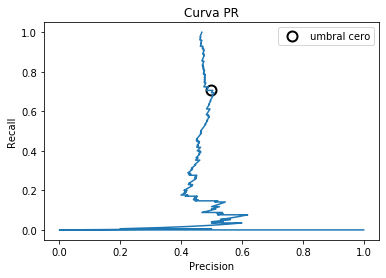

In [147]:
precision, recall, thresholds = precision_recall_curve(testy2, lrgrid2.decision_function(testX2))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="umbral cero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Curva PR")

Text(0.5, 1.0, 'Curva ROC')

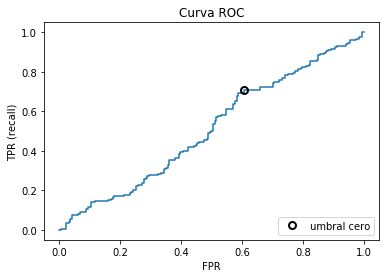

In [148]:
fpr, tpr, thresholds = roc_curve(testy2, lrgrid2.decision_function(testX2))

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=7,label="umbral cero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.title("Curva ROC")

## 10 DIAS

Cargamos los datos:

In [167]:
run Datos-10diasBINARIO.ipynb

### EXPERIMENTO 1: MODELO BASE

In [168]:
# MODELO CON EL CONJUNTO DE DATOS 1
# -------------------------------------------------------------------
logreg1 = LogisticRegression(max_iter=10000).fit(trainX1, trainy1)
pred_logreg1 = logreg1.predict(testX1)
confusion1 = confusion_matrix(testy1, pred_logreg1)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg1.score(testX1, testy1)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, pred_logreg1)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy1, pred_logreg1)))
print("Matriz de confusión:\n{}".format(confusion1))

Tasa de acierto en regresión logística: 0.49
Tasa de aciertos balanceada regresión logística: 0.51
Medida F1 regresión logística: 0.61
Matriz de confusión:
[[ 37 162]
 [ 28 148]]


In [169]:
# MODELO CON EL CONJUNTO DE DATOS 2
# -------------------------------------------------------------------
logreg2 = LogisticRegression(max_iter=10000).fit(trainX2, trainy2)
pred_logreg2 = logreg2.predict(testX2)
confusion2 = confusion_matrix(testy2, pred_logreg2)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg2.score(testX2, testy2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, pred_logreg2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, pred_logreg2)))
print("Matriz de confusión:\n{}".format(confusion2))

Tasa de acierto en regresión logística: 0.48
Tasa de aciertos balanceada regresión logística: 0.49
Medida F1 regresión logística: 0.53
Matriz de confusión:
[[ 66 125]
 [ 64 107]]


In [170]:
# MODELO CON EL CONJUNTO DE DATOS 3
# -------------------------------------------------------------------
logreg3 = LogisticRegression(max_iter=10000).fit(trainX3, trainy3)
pred_logreg3 = logreg3.predict(testX3)
confusion = confusion_matrix(testy3, pred_logreg3)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg3.score(testX3, testy3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, pred_logreg3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, pred_logreg3)))
print("Matriz de confusión:\n{}".format(confusion))

Tasa de acierto en regresión logística: 0.51
Tasa de aciertos balanceada regresión logística: 0.50
Medida F1 regresión logística: 0.39
Matriz de confusión:
[[124  63]
 [113  56]]


### EXPERIMENTO 1: GRIDSEARCH

In [171]:
# MODELO CON EL CONJUNTO DE DATOS 1
# -------------------------------------------------------------------
modelgrid1 = LogisticRegression()
parameters1 = {"C":np.logspace(-3,3,7), "penalty":["none","l2"]}
grid1 = GridSearchCV(modelgrid1,parameters1, cv=None).fit(trainX1, trainy1)
grid1.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will i

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

LogisticRegression(C=0.001, penalty='none')

In [174]:
lrgrid1 = LogisticRegression(C=0.001, penalty='none').fit(trainX1, trainy1)
y_predg1 = lrgrid1.predict(testX1)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [175]:
pred_lrgrid1 = lrgrid1.predict(testX1)
confusiong1 = confusion_matrix(testy1, pred_lrgrid1)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid1.score(testX1, testy1)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, pred_logreg1)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy1, pred_logreg1)))
print("Matriz de confusión:\n{}".format(confusiong1))

Tasa de acierto en regresión logística: 0.49
Tasa de aciertos balanceada regresión logística: 0.51
Medida F1 regresión logística: 0.61
Matriz de confusión:
[[ 37 162]
 [ 28 148]]


In [172]:
# MODELO CON EL CONJUNTO DE DATOS 2
# -------------------------------------------------------------------
modelgrid2 = LogisticRegression()
parameters2 = {"C":np.logspace(-3,3,7), "penalty":["none","l2"]}
grid2 = GridSearchCV(modelgrid2,parameters2, cv=None).fit(trainX2, trainy2)
grid2.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=0.01)

In [176]:
lrgrid2 = LogisticRegression(C=0.01, penalty='none').fit(trainX2, trainy2)
y_predg2 = lrgrid2.predict(testX2)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [177]:
pred_lrgrid2 = lrgrid2.predict(testX2)
confusiong2 = confusion_matrix(testy2, pred_lrgrid2)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid2.score(testX2, testy2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, pred_logreg2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, pred_logreg2)))
print("Matriz de confusión:\n{}".format(confusiong2))

Tasa de acierto en regresión logística: 0.52
Tasa de aciertos balanceada regresión logística: 0.49
Medida F1 regresión logística: 0.53
Matriz de confusión:
[[ 77 114]
 [ 61 110]]


In [173]:
# MODELO CON EL CONJUNTO DE DATOS 3
# -------------------------------------------------------------------
modelgrid3 = LogisticRegression()
parameters3 = {"C":np.logspace(-3,3,7), "penalty":["l2",None]}
grid3 = GridSearchCV(modelgrid3,parameters3, cv=None).fit(trainX3, trainy3)
grid3.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARA\anaconda3\lib\site-packages\

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=0.1)

In [178]:
lrgrid3 = LogisticRegression(C=0.1).fit(trainX3, trainy3)
y_predg3 = lrgrid3.predict(testX3)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [179]:
pred_lrgrid3 = lrgrid3.predict(testX3)
confusiong3 = confusion_matrix(testy3, pred_lrgrid3)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid3.score(testX3, testy3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, pred_logreg3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, pred_logreg3)))
print("Matriz de confusión:\n{}".format(confusiong3))

Tasa de acierto en regresión logística: 0.51
Tasa de aciertos balanceada regresión logística: 0.50
Medida F1 regresión logística: 0.39
Matriz de confusión:
[[110  77]
 [ 98  71]]


### Mejora Modelo GridSearch - Datos 2

#### Usando la incertidumbre en las predicciones: umbrales y curvas

In [180]:
testy2.value_counts() + trainy2.value_counts()

0.0    871
1.0    938
Name: Subida, dtype: int64

In [181]:
print(classification_report(testy2, pred_logreg2,target_names=["Baja", "Sube"]))

              precision    recall  f1-score   support

        Baja       0.51      0.35      0.41       191
        Sube       0.46      0.63      0.53       171

    accuracy                           0.48       362
   macro avg       0.48      0.49      0.47       362
weighted avg       0.49      0.48      0.47       362



In [182]:
confusion2 = confusion_matrix(testy2, pred_logreg2)
print("Matriz de confusión:\n{}".format(confusion2))

Matriz de confusión:
[[ 66 125]
 [ 64 107]]


In [194]:
y_pred_lower_threshold2 = lrgrid2.decision_function(testX2) > 0.01

In [195]:
confusiongumbral = confusion_matrix(testy2, y_pred_lower_threshold2)
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(accuracy_score(testy2, y_pred_lower_threshold2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_pred_lower_threshold2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, y_pred_lower_threshold2)))
print("Matriz de confusión:\n{}".format(confusiongumbral))

Tasa de aciertos balanceada regresión logística: 0.52
Tasa de aciertos balanceada regresión logística: 0.53
Medida F1 regresión logística: 0.55
Matriz de confusión:
[[ 82 109]
 [ 64 107]]


In [185]:
precision, recall, thresholds = precision_recall_curve( testy2, lrgrid2.decision_function(testX2))
for u,p,r in zip(thresholds,precision,recall):
    print("Umbral: {:.3f}. (P,R)=({:.2f},{:.2f})".format(u,p,r))

Umbral: -1.562. (P,R)=(0.47,1.00)
Umbral: -0.875. (P,R)=(0.47,0.99)
Umbral: -0.596. (P,R)=(0.47,0.99)
Umbral: -0.587. (P,R)=(0.47,0.99)
Umbral: -0.534. (P,R)=(0.47,0.99)
Umbral: -0.532. (P,R)=(0.47,0.99)
Umbral: -0.532. (P,R)=(0.47,0.98)
Umbral: -0.509. (P,R)=(0.47,0.98)
Umbral: -0.498. (P,R)=(0.47,0.98)
Umbral: -0.496. (P,R)=(0.48,0.98)
Umbral: -0.494. (P,R)=(0.48,0.98)
Umbral: -0.489. (P,R)=(0.48,0.98)
Umbral: -0.484. (P,R)=(0.48,0.98)
Umbral: -0.458. (P,R)=(0.48,0.97)
Umbral: -0.453. (P,R)=(0.47,0.96)
Umbral: -0.435. (P,R)=(0.48,0.96)
Umbral: -0.433. (P,R)=(0.47,0.96)
Umbral: -0.411. (P,R)=(0.47,0.95)
Umbral: -0.411. (P,R)=(0.47,0.95)
Umbral: -0.396. (P,R)=(0.48,0.95)
Umbral: -0.388. (P,R)=(0.48,0.95)
Umbral: -0.383. (P,R)=(0.48,0.95)
Umbral: -0.377. (P,R)=(0.48,0.95)
Umbral: -0.373. (P,R)=(0.47,0.94)
Umbral: -0.366. (P,R)=(0.47,0.94)
Umbral: -0.340. (P,R)=(0.47,0.93)
Umbral: -0.332. (P,R)=(0.47,0.92)
Umbral: -0.331. (P,R)=(0.47,0.92)
Umbral: -0.323. (P,R)=(0.47,0.92)
Umbral: -0.320

Text(0.5, 1.0, 'Curva PR')

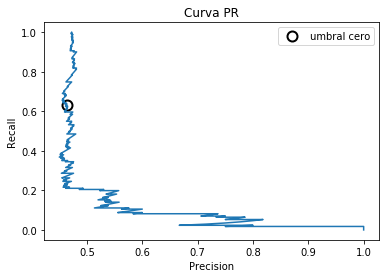

In [186]:
precision, recall, thresholds = precision_recall_curve(testy2, logreg2.decision_function(testX2))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="umbral cero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Curva PR")

Text(0.5, 1.0, 'Curva ROC')

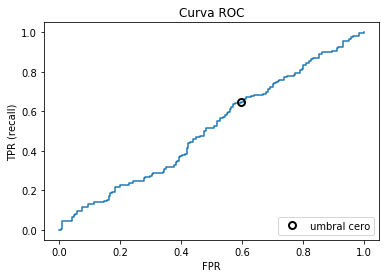

In [187]:
fpr, tpr, thresholds = roc_curve(testy2, lrgrid2.decision_function(testX2))

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=7,label="umbral cero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.title("Curva ROC")

## 20 DIAS

Cargamos los datos:

In [196]:
run Datos-20diasBINARIO.ipynb

### EXPERIMENTO 1: MODELO BASE

In [197]:
# MODELO CON EL CONJUNTO DE DATOS 1
# -------------------------------------------------------------------
logreg1 = LogisticRegression(max_iter=10000).fit(trainX1, trainy1)
pred_logreg1 = logreg1.predict(testX1)
confusion1 = confusion_matrix(testy1, pred_logreg1)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg1.score(testX1, testy1)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, pred_logreg1)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy1, pred_logreg1)))
print("Matriz de confusión:\n{}".format(confusion1))

Tasa de acierto en regresión logística: 0.49
Tasa de aciertos balanceada regresión logística: 0.51
Medida F1 regresión logística: 0.61
Matriz de confusión:
[[ 37 162]
 [ 28 148]]


In [198]:
# MODELO CON EL CONJUNTO DE DATOS 2
# -------------------------------------------------------------------
logreg2 = LogisticRegression(max_iter=10000).fit(trainX2, trainy2)
pred_logreg2 = logreg2.predict(testX2)
confusion2 = confusion_matrix(testy2, pred_logreg2)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg2.score(testX2, testy2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, pred_logreg2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, pred_logreg2)))
print("Matriz de confusión:\n{}".format(confusion2))

Tasa de acierto en regresión logística: 0.48
Tasa de aciertos balanceada regresión logística: 0.49
Medida F1 regresión logística: 0.53
Matriz de confusión:
[[ 66 125]
 [ 64 107]]


In [199]:
# MODELO CON EL CONJUNTO DE DATOS 3
# -------------------------------------------------------------------
logreg3 = LogisticRegression(max_iter=10000).fit(trainX3, trainy3)
pred_logreg3 = logreg3.predict(testX3)
confusion = confusion_matrix(testy3, pred_logreg3)
print("Tasa de acierto en regresión logística: {:.2f}".format(logreg3.score(testX3, testy3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, pred_logreg3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, pred_logreg3)))
print("Matriz de confusión:\n{}".format(confusion))

Tasa de acierto en regresión logística: 0.51
Tasa de aciertos balanceada regresión logística: 0.50
Medida F1 regresión logística: 0.39
Matriz de confusión:
[[124  63]
 [113  56]]


### EXPERIMENTO 1: GRIDSEARCH

In [200]:
# MODELO CON EL CONJUNTO DE DATOS 1
# -------------------------------------------------------------------
modelgrid1 = LogisticRegression()
parameters1 = {"C":np.logspace(-3,3,7), "penalty":["none","l2"]}
grid1 = GridSearchCV(modelgrid1,parameters1, cv=None).fit(trainX1, trainy1)
grid1.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will i

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

LogisticRegression(C=0.001, penalty='none')

In [203]:
lrgrid1 = LogisticRegression(C=0.001, penalty='none').fit(trainX1, trainy1)
y_predg1 = lrgrid1.predict(testX1)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [204]:
pred_lrgrid1 = lrgrid1.predict(testX1)
confusiong1 = confusion_matrix(testy1, pred_lrgrid1)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid1.score(testX1, testy1)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, pred_logreg1)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy1, pred_logreg1)))
print("Matriz de confusión:\n{}".format(confusiong1))

Tasa de acierto en regresión logística: 0.49
Tasa de aciertos balanceada regresión logística: 0.51
Medida F1 regresión logística: 0.61
Matriz de confusión:
[[ 37 162]
 [ 28 148]]


In [201]:
# MODELO CON EL CONJUNTO DE DATOS 2
# -------------------------------------------------------------------
modelgrid2 = LogisticRegression()
parameters2 = {"C":np.logspace(-3,3,7), "penalty":["none","l2"]}
grid2 = GridSearchCV(modelgrid2,parameters2, cv=None).fit(trainX2, trainy2)
grid2.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=0.01)

In [205]:
lrgrid2 = LogisticRegression(C=0.01).fit(trainX2, trainy2)
y_predg2 = lrgrid2.predict(testX2)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [206]:
pred_lrgrid2 = lrgrid2.predict(testX2)
confusiong2 = confusion_matrix(testy2, pred_lrgrid2)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid2.score(testX2, testy2)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, pred_logreg2)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy2, pred_logreg2)))
print("Matriz de confusión:\n{}".format(confusiong2))

Tasa de acierto en regresión logística: 0.51
Tasa de aciertos balanceada regresión logística: 0.49
Medida F1 regresión logística: 0.53
Matriz de confusión:
[[ 78 113]
 [ 65 106]]


In [202]:
# MODELO CON EL CONJUNTO DE DATOS 3
# -------------------------------------------------------------------
modelgrid3 = LogisticRegression()
parameters3 = {"C":np.logspace(-3,3,7), "penalty":["l2",None]}
grid3 = GridSearchCV(modelgrid3,parameters3, cv=None).fit(trainX3, trainy3)
grid3.best_estimator_

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=0.1)

In [207]:
lrgrid3 = LogisticRegression(C=0.1).fit(trainX3, trainy3)
y_predg3 = lrgrid3.predict(testX3)

C:\Users\SARA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [208]:
pred_lrgrid3 = lrgrid3.predict(testX3)
confusiong3 = confusion_matrix(testy3, pred_lrgrid3)
print("Tasa de acierto en regresión logística: {:.2f}".format(lrgrid3.score(testX3, testy3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, pred_logreg3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, pred_logreg3)))
print("Matriz de confusión:\n{}".format(confusiong3))

Tasa de acierto en regresión logística: 0.51
Tasa de aciertos balanceada regresión logística: 0.50
Medida F1 regresión logística: 0.39
Matriz de confusión:
[[110  77]
 [ 98  71]]


### Mejora Modelo Base - Conjunto de datos 3

#### Usando la incertidumbre en las predicciones: umbrales y curvas

In [209]:
testy3.value_counts() + trainy3.value_counts()

0.0    857
1.0    923
Name: Subida, dtype: int64

In [210]:
print(classification_report(testy3, pred_logreg3,target_names=["Baja", "Sube"]))

              precision    recall  f1-score   support

        Baja       0.52      0.66      0.58       187
        Sube       0.47      0.33      0.39       169

    accuracy                           0.51       356
   macro avg       0.50      0.50      0.49       356
weighted avg       0.50      0.51      0.49       356



In [212]:
confusion3 = confusion_matrix(testy3, pred_logreg3)
print("Matriz de confusión:\n{}".format(confusion3))

Matriz de confusión:
[[124  63]
 [113  56]]


In [237]:
y_pred_lower_threshold3 = logreg3.decision_function(testX3) < 0.2

In [238]:
confusiongumbral = confusion_matrix(testy3, y_pred_lower_threshold3)
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(accuracy_score(testy3, y_pred_lower_threshold3)))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_pred_lower_threshold3)))
print("Medida F1 regresión logística: {:.2f}".format(f1_score(testy3, y_pred_lower_threshold3)))
print("Matriz de confusión:\n{}".format(confusiongumbral))

Tasa de aciertos balanceada regresión logística: 0.51
Tasa de aciertos balanceada regresión logística: 0.53
Medida F1 regresión logística: 0.62
Matriz de confusión:
[[ 36 151]
 [ 24 145]]


In [216]:
precision, recall, thresholds = precision_recall_curve( testy3, logreg3.decision_function(testX3))
for u,p,r in zip(thresholds,precision,recall):
    print("Umbral: {:.3f}. (P,R)=({:.2f},{:.2f})".format(u,p,r))

Umbral: -1.866. (P,R)=(0.47,1.00)
Umbral: -1.286. (P,R)=(0.47,0.99)
Umbral: -1.195. (P,R)=(0.47,0.99)
Umbral: -1.162. (P,R)=(0.48,0.99)
Umbral: -1.086. (P,R)=(0.47,0.99)
Umbral: -1.048. (P,R)=(0.48,0.99)
Umbral: -1.012. (P,R)=(0.47,0.98)
Umbral: -1.005. (P,R)=(0.48,0.98)
Umbral: -0.947. (P,R)=(0.47,0.98)
Umbral: -0.938. (P,R)=(0.48,0.98)
Umbral: -0.911. (P,R)=(0.48,0.98)
Umbral: -0.897. (P,R)=(0.48,0.97)
Umbral: -0.892. (P,R)=(0.48,0.97)
Umbral: -0.866. (P,R)=(0.48,0.96)
Umbral: -0.863. (P,R)=(0.47,0.96)
Umbral: -0.856. (P,R)=(0.47,0.95)
Umbral: -0.849. (P,R)=(0.47,0.95)
Umbral: -0.818. (P,R)=(0.47,0.94)
Umbral: -0.795. (P,R)=(0.47,0.93)
Umbral: -0.795. (P,R)=(0.47,0.93)
Umbral: -0.789. (P,R)=(0.46,0.92)
Umbral: -0.788. (P,R)=(0.46,0.92)
Umbral: -0.779. (P,R)=(0.46,0.91)
Umbral: -0.774. (P,R)=(0.46,0.91)
Umbral: -0.759. (P,R)=(0.46,0.91)
Umbral: -0.753. (P,R)=(0.47,0.91)
Umbral: -0.753. (P,R)=(0.46,0.91)
Umbral: -0.749. (P,R)=(0.47,0.91)
Umbral: -0.734. (P,R)=(0.46,0.90)
Umbral: -0.692

Text(0.5, 1.0, 'Curva PR')

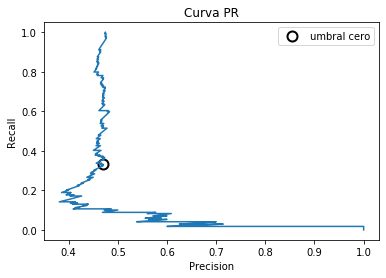

In [217]:
precision, recall, thresholds = precision_recall_curve(testy3, logreg3.decision_function(testX3))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="umbral cero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Curva PR")

Text(0.5, 1.0, 'Curva ROC')

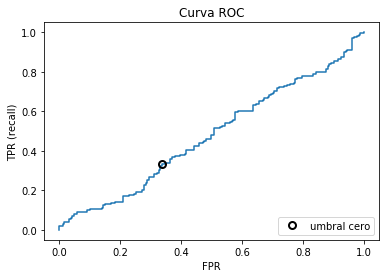

In [218]:
fpr, tpr, thresholds = roc_curve(testy3, logreg3.decision_function(testX3))

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=7,label="umbral cero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.title("Curva ROC")